In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv("dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna(inplace=True)

# Analysing data

In [9]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

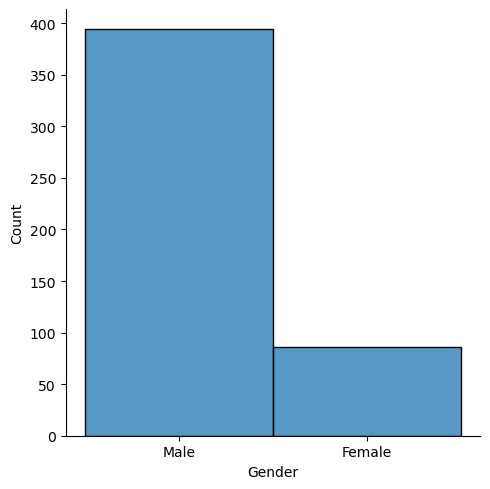

In [10]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='Gender')

In [11]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

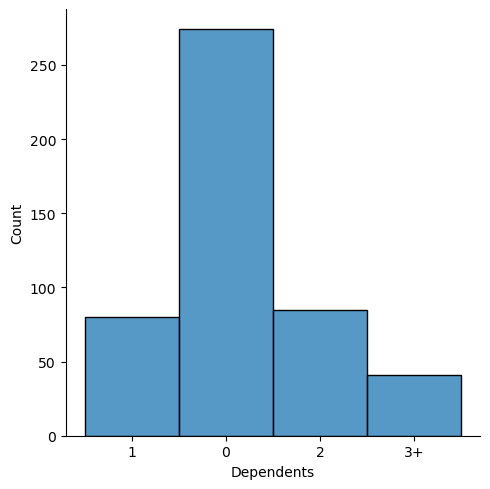

In [12]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='Dependents')

In [13]:
df['Dependents'] = df['Dependents'].apply(lambda x: 3 if x == '3+' else x)

In [14]:
df['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [15]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 186, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

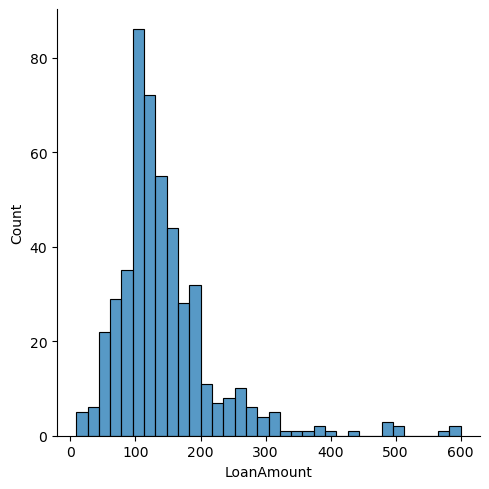

In [16]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='LoanAmount')

In [17]:
df['ApplicantIncome'].value_counts()

ApplicantIncome
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: count, Length: 405, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

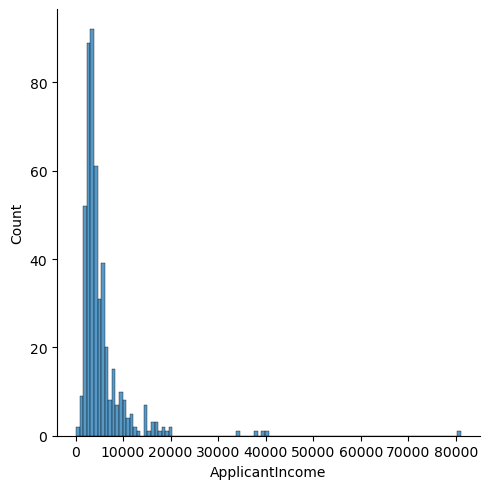

In [18]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='ApplicantIncome')

# converting data into numerical value

In [19]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)
df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)
df.replace({'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)
df.replace({'Dependents':{'3+':3}},inplace=True)
df=df.drop('Loan_ID', axis=1)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
x=df.drop('Loan_Status', axis=1)

In [23]:
df['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [24]:
y=df['Loan_Status']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [26]:
x_train.shape

(432, 11)

In [27]:
x_test.shape

(48, 11)

In [28]:
model=LinearRegression()

In [29]:
train=model.fit(x_train,y_train)

In [30]:
y_pred = model.predict(x_test) 

In [31]:
y_pred

array([ 0.72863485,  0.07134857,  0.66782677,  0.92035829,  0.72072038,
        0.84537565,  0.19546621,  0.80887813,  0.89292097,  0.83555908,
        0.90854645,  0.8087622 ,  0.71280838,  0.93235477,  0.05281873,
        0.71836986,  0.58293594,  0.74047939,  0.97186718,  0.17219204,
        0.63554143,  0.31411166,  0.89971385,  0.97387296,  0.67539059,
        0.90637163,  0.59824496,  0.73132199,  0.73531891,  0.81550366,
        0.74455726,  0.7472431 ,  0.87899356,  0.82965583,  0.74729479,
        0.80813901,  0.91555816,  0.9023142 ,  0.86368854,  0.78614494,
        0.72198812,  0.66260967,  0.74494509,  0.90079534,  0.16704679,
        0.93554672,  0.60093272, -0.05212721])

In [32]:
r2_score(y_test,y_pred)

0.3191578547180184

In [37]:
input_df = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = model.predict(input_df_reshaped)
print("Your Percentage for getting homeloan are",prediction[0]*100)

Your Percentage for getting homeloan are 75.46033395743567


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
